<a href="https://colab.research.google.com/github/kuruvajayanth12/Neural-Networks-and-Deep-Learning/blob/main/RGB_To_GRAYSCALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torch torchvision pillow matplotlib


In [ ]:
import torch
import torch.nn as nn

class RGB2GrayCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(
            in_channels=3,
            out_channels=1,
            kernel_size=1,
            bias=False
        )

        # Initialize with standard grayscale weights
        self.conv.weight.data = torch.tensor(
            [[[[0.299]], [[0.587]], [[0.114]]]]
        )

    def forward(self, x):
        return self.conv(x)


In [ ]:
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

from PIL import Image

img = Image.open("/content/Jayanth.jpg").convert("RGB")
print(img.size, img.mode)

transform = transforms.Compose([
    transforms.ToTensor()  # (H,W,C) → (C,H,W), values [0,1]
])

x = transform(img).unsqueeze(0)  # add batch dimension


(960, 1280) RGB


In [ ]:
model = RGB2GrayCNN()
model.eval()

with torch.no_grad():
    gray = model(x)


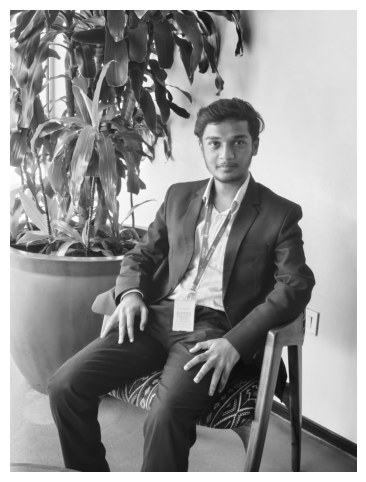

In [ ]:
gray_img = gray.squeeze().numpy()

plt.figure(figsize=(6,6))
plt.imshow(gray_img, cmap="gray")
plt.axis("off")
plt.show()
